# Download de músicas


Esse noteboook surgiu com o intuito de percebermos quais músicas temos baixadas e quais não conseguimos realizar o download pelo código. 

In [9]:
import math
import numpy as np
import matplotlib.pyplot as pyplot

# !pip install babypandas
import babypandas as bpd
import pandas as pd

A princípio, estávamos com mais de 900 músicas sem baixar. Assim, fizemos o processo a seguir na primeira vez para essas 900 músicas.
Depois, rodamos o código de baixar as músicas apenas para as músicas não baixadas, o que resultou em mais 400 músicas com o áudio
no computador. Por fim, fizemos o processo abaixo e, por fim, chegamos que, das 6400 músicas, não conseguimos fazer o download do 
áudio de apenas 501 músicas, o que corresponde a cerca de 8% das músicas.

In [10]:
songsArtists = bpd.read_csv('songs_and_artists_updated.csv')
songsArtists

,Year,Position,Song,Artist,Country,Genre
0,1960,1,Theme From A Summer Place,Percy Faith,Canada,death by cancer
1,1960,2,Banho De Lua,Celly Campello,Brazil,rock and roll
2,1960,3,A Noite Do Meu Bem,Dolores Duran,Rio de Janeiro,samba
3,1960,4,Esmeralda,Carlos José,Brazil,brazilian singer
4,1960,5,Mulher De Trinta,Miltinho,Brazil,samba
...,...,...,...,...,...,...
6395,2023,96,Haja colirio,"Guilherme e Benuto, Hugo e Guilherme",Brazil,Unknown
6396,2023,97,Ela,"Sorriso Maroto, Ferrugem",Brazil,Unknown
6397,2023,98,Perfeito pra ficar sozinho,"Murilo Huff, Maiara e Maraísa",Brazil,Unknown
6398,2023,99,Daqui pra sempre,"Manu, Simone Mendes",Brazil,Unknown


In [4]:
downloadedSongs = bpd.read_csv('filenames.csv')
downloadedSongs

,filename
0,#TBT-ClebereCauan.webm
1,(EverythingIDo)IDoItForYou-BryanAdams.webm
2,(ICan’tGetNo)Satisfaction-TheRollingStones.webm
3,(IJust)DiedInYourArms-CuttingCrew.webm
4,(JustLike)StartingOver-JohnLennon.webm
...,...
5934,"Ó,meusenhor-WilsonMiranda.webm"
5935,Óculos-OsParalamasdoSucesso.webm
5936,Ódio-Luxúria.webm
5937,Últimobeijo-BrunoeMarroneftWesleySafadão.webm


In [5]:
# Remover espaços para deixar as tabelas mais parecidas - Tratamento dos nomes das músicas

def remove_spaces(frase):
    if isinstance(frase, float):  # Verifica se o valor é float
        frase = str(frase)  # Converte para string
    return frase.replace(" ", "")


newSongsArtists = (
    songsArtists.assign(
        songConc = songsArtists.get('Song').apply(remove_spaces),
        artistConc = songsArtists.get('Artist').apply(remove_spaces)
    )
)

newSongsArtists =(
    newSongsArtists.assign(
        nameSong = newSongsArtists.get('songConc') + '-' + newSongsArtists.get('artistConc')
    )
)

In [6]:
newSongsArtists = newSongsArtists.drop(columns = ['songConc', 'artistConc', 'Song', 'Artist']) 

In [7]:
newSongsArtists

,Year,Position,Country,Genre,nameSong
0,1960,1,Canada,death by cancer,ThemeFromASummerPlace-PercyFaith
1,1960,2,Brazil,rock and roll,BanhoDeLua-CellyCampello
2,1960,3,Rio de Janeiro,samba,ANoiteDoMeuBem-DoloresDuran
3,1960,4,Brazil,brazilian singer,Esmeralda-CarlosJosé
4,1960,5,Brazil,samba,MulherDeTrinta-Miltinho
...,...,...,...,...,...
6395,2023,96,Brazil,Unknown,"Hajacolirio-GuilhermeeBenuto,HugoeGuilherme"
6396,2023,97,Brazil,Unknown,"Ela-SorrisoMaroto,Ferrugem"
6397,2023,98,Brazil,Unknown,"Perfeitopraficarsozinho-MuriloHuff,MaiaraeMaraísa"
6398,2023,99,Brazil,Unknown,"Daquiprasempre-Manu,SimoneMendes"


In [8]:
# Remover a extensão do nome do arquivo

def remove_after_period(word):
    """
    Remove todos os caracteres de uma palavra a partir do ponto final.
    
    Args:
    word (str): A palavra da qual remover os caracteres após o ponto final.
    
    Returns:
    str: A palavra sem os caracteres após o ponto final.
    """

    if isinstance(word, float):  # Verifica se o valor é float
        frase = str(word)  # Converte para string
    # Divide a palavra no ponto final e pega a primeira parte
    return word.split('.')[0]

downloadedSongs = (
    downloadedSongs.assign(
        realName = (
            downloadedSongs
            .get('filename')
            .apply(remove_after_period)
        )
    )
)

downloadedSongs

,filename,realName
0,#TBT-ClebereCauan.webm,#TBT-ClebereCauan
1,(EverythingIDo)IDoItForYou-BryanAdams.webm,(EverythingIDo)IDoItForYou-BryanAdams
2,(ICan’tGetNo)Satisfaction-TheRollingStones.webm,(ICan’tGetNo)Satisfaction-TheRollingStones
3,(IJust)DiedInYourArms-CuttingCrew.webm,(IJust)DiedInYourArms-CuttingCrew
4,(JustLike)StartingOver-JohnLennon.webm,(JustLike)StartingOver-JohnLennon
...,...,...
5934,"Ó,meusenhor-WilsonMiranda.webm","Ó,meusenhor-WilsonMiranda"
5935,Óculos-OsParalamasdoSucesso.webm,Óculos-OsParalamasdoSucesso
5936,Ódio-Luxúria.webm,Ódio-Luxúria
5937,Últimobeijo-BrunoeMarroneftWesleySafadão.webm,Últimobeijo-BrunoeMarroneftWesleySafadão


In [9]:
# Merge dos DataFrames
ready_df = downloadedSongs.merge(newSongsArtists, left_on='realName', right_on='nameSong', how='inner')
ready_df

,filename,realName,Year,Position,Country,Genre,nameSong
0,#TBT-ClebereCauan.webm,#TBT-ClebereCauan,2018,34,Brazil,Unknown,#TBT-ClebereCauan
1,(EverythingIDo)IDoItForYou-BryanAdams.webm,(EverythingIDo)IDoItForYou-BryanAdams,1991,1,Canada,rock,(EverythingIDo)IDoItForYou-BryanAdams
2,(ICan’tGetNo)Satisfaction-TheRollingStones.webm,(ICan’tGetNo)Satisfaction-TheRollingStones,1966,18,United Kingdom,rock,(ICan’tGetNo)Satisfaction-TheRollingStones
3,(IJust)DiedInYourArms-CuttingCrew.webm,(IJust)DiedInYourArms-CuttingCrew,1987,63,United Kingdom,pop,(IJust)DiedInYourArms-CuttingCrew
4,(JustLike)StartingOver-JohnLennon.webm,(JustLike)StartingOver-JohnLennon,1981,6,United Kingdom,aln-sh,(JustLike)StartingOver-JohnLennon
...,...,...,...,...,...,...,...
5898,"Ó,meusenhor-WilsonMiranda.webm","Ó,meusenhor-WilsonMiranda",1964,66,Unknown,Unknown,"Ó,meusenhor-WilsonMiranda"
5899,Óculos-OsParalamasdoSucesso.webm,Óculos-OsParalamasdoSucesso,1984,4,Brazil,rock brasil,Óculos-OsParalamasdoSucesso
5900,Ódio-Luxúria.webm,Ódio-Luxúria,2006,80,Brazil,Unknown,Ódio-Luxúria
5901,Últimobeijo-BrunoeMarroneftWesleySafadão.webm,Últimobeijo-BrunoeMarroneftWesleySafadão,2021,8,Brazil,forró eletrônico,Últimobeijo-BrunoeMarroneftWesleySafadão


In [10]:
groupedYear = ready_df.groupby('Year').count()

In [11]:
groupedYear.iloc[0]

filename    96
realName    96
Position    96
Country     96
Genre       96
nameSong    96
Name: 1960, dtype: int64

In [12]:
# Existe algum ano que não está presente no DataFrame? 

# Definir o intervalo de anos
start_year = 1960
end_year = 2023

# Criar uma lista com todos os anos no intervalo
all_years = list(range(start_year, end_year + 1))

# Obter os anos presentes no índice do DataFrame
present_years = groupedYear.index.tolist()

# Encontrar os anos ausentes
missing_years = set(all_years) - set(present_years)

# Converter para lista e ordenar
missing_years = sorted(list(missing_years))

print("Anos ausentes entre 1960 e 2023:")
print(missing_years)

Anos ausentes entre 1960 e 2023:
[]


In [13]:
# Mas quais anos temos menos músicas baixadas?
groupedYear[groupedYear.get('realName') == groupedYear.get('realName').min()]

,filename,realName,Position,Country,Genre,nameSong
Year,,,,,,
2017,78,78,78,78,78,78


In [14]:
# Finalmente, quais foram as músicas que não conseguimos baixar?

# Obter os nomes das músicas de `newSongsArtists` e `ready_df`
original_songs = newSongsArtists.get('nameSong') #6400
merged_songs = ready_df.get('realName') #5445

songsList = original_songs.values.tolist()
downlist = merged_songs.values.tolist()

# Inicializar uma lista para armazenar elementos exclusivos
notDownloaded = np.array([])

# Encontrar elementos em list1 que não estão em list2
for element in songsList:
    if element not in downlist:
        notDownloaded = np.append(notDownloaded,element)

dfNot = bpd.DataFrame()
dfNot = dfNot.assign(songsName = notDownloaded)

mergedToShow = dfNot.merge(newSongsArtists, left_on='songsName', right_on='nameSong', how='inner')

In [15]:
mergedToShow = mergedToShow.drop(columns = 'songsName')

In [16]:
mergedToShow

,Year,Position,Country,Genre,nameSong
0,1960,24,Brazil,singer-songwriter,PorQuemSonhaAnaMaria?-JucaChaves
1,1960,28,Unknown,Unknown,ÓCrides-RonaldGolias
2,1960,89,Brazil,bossa nova,OQueTinhaDeSer-SylviaTelles
3,1960,95,Portugal,portuguese,MorrerPorTi-OswaldoRodrigues
4,1961,39,United States,blues,G.i.blues-ElvisPresley
...,...,...,...,...,...
530,2022,80,Brazil,Unknown,Umsonhador/Nãoprecisa/Nãoaprendidizeradeus-Lau...
531,2023,16,Brazil,country,"EsseB.O.émeu-GuilhermeeBenuto,MatheuseKauan"
532,2023,33,Brazil,sertanejo,"Cadêseunamoradomoça?-ThalesLessa,BrunoeMarrone"
533,2023,54,Brazil,Unknown,Ninguempodesaber-MarcoseBelutti


In [17]:
# Identificar linhas duplicadas

def find_duplicates(df):
    unique_rows = []
    duplicates = []

    # Itera sobre o DataFrame
    for idx, row in enumerate(df.values):
        # Verifica se a linha já está na lista de linhas únicas
        if any((row == ur).all() for ur in unique_rows):
            duplicates.append(idx)
        else:
            unique_rows.append(row)
    
    return duplicates

duplicate_indices = find_duplicates(mergedToShow)
print("Índices das linhas duplicadas:", duplicate_indices)


# Remover duplicadas e deixar apenas a primeira ocorrência
def remove_duplicates(df):
    unique_rows = []
    for row in df.values:
        if not any((row == ur).all() for ur in unique_rows):
            unique_rows.append(row)
    
    # Criar um novo DataFrame a partir das linhas únicas
    unique_df = pd.DataFrame(unique_rows, columns=df.columns)
    return unique_df

notDownloadedSongs = remove_duplicates(mergedToShow)


Índices das linhas duplicadas: [49, 50, 97, 98, 109, 110, 256, 257, 258, 259, 288, 289, 295, 296, 297, 298, 299, 300, 312, 313, 360, 361, 367, 368, 372, 373, 382, 383, 387, 388, 400, 401, 455, 456]


In [18]:
notDownloadedSongs.to_csv('notDownloadedSongs.csv', index=False)

In [19]:
notDownloadedSongs

,Year,Position,Country,Genre,nameSong
0,1960,24,Brazil,singer-songwriter,PorQuemSonhaAnaMaria?-JucaChaves
1,1960,28,Unknown,Unknown,ÓCrides-RonaldGolias
2,1960,89,Brazil,bossa nova,OQueTinhaDeSer-SylviaTelles
3,1960,95,Portugal,portuguese,MorrerPorTi-OswaldoRodrigues
4,1961,39,United States,blues,G.i.blues-ElvisPresley
...,...,...,...,...,...
496,2022,80,Brazil,Unknown,Umsonhador/Nãoprecisa/Nãoaprendidizeradeus-Lau...
497,2023,16,Brazil,country,"EsseB.O.émeu-GuilhermeeBenuto,MatheuseKauan"
498,2023,33,Brazil,sertanejo,"Cadêseunamoradomoça?-ThalesLessa,BrunoeMarrone"
499,2023,54,Brazil,Unknown,Ninguempodesaber-MarcoseBelutti


<Axes: ylabel='Year'>

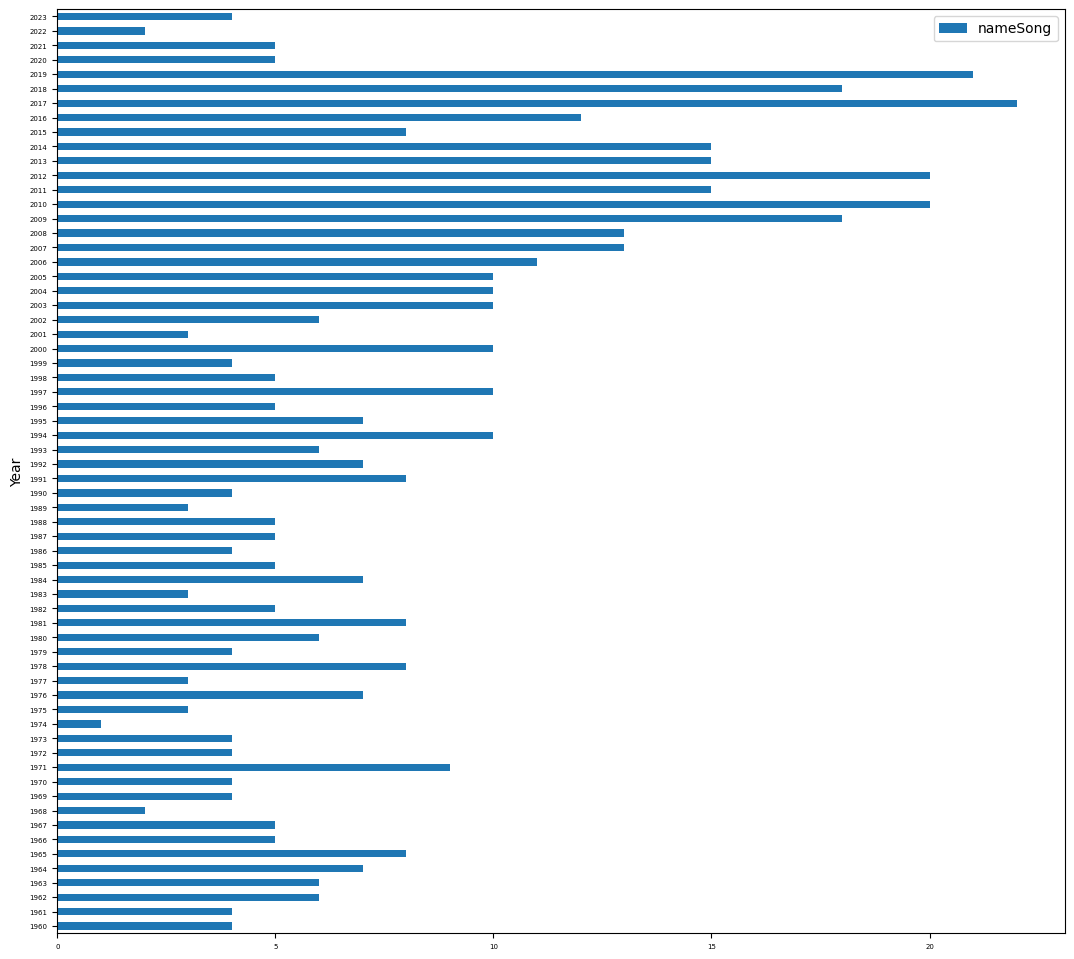

In [20]:
yearR = notDownloadedSongs.groupby('Year').count()
yearR.plot(kind='barh', y='nameSong', fontsize=5, figsize=(13, 12))

Temos mais de 75% das músicas de todos os anos!

<Axes: ylabel='Position'>

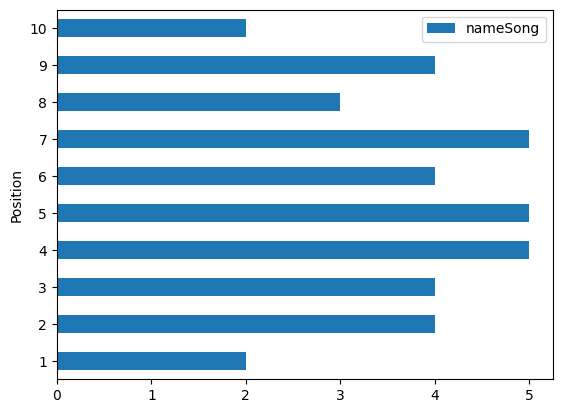

In [22]:
posN = notDownloadedSongs.groupby('Position').count()
(posN.loc[range(1,11)]).plot(kind='barh', y='nameSong')

In [23]:
notDownloadedSongs[notDownloadedSongs.get('Year') == 2017]

,Year,Position,Country,Genre,nameSong
424,2017,14,Brazil,sertanejo,Amigotaxista-ZéNetoeCristiano
425,2017,15,Brazil,Unknown,CêAcredita-JoãoNetoeFredericopart.MCKevinho
426,2017,16,Brazil,sertanejo,Raspão-Henrique&Diegoft.Simone&Simaria
427,2017,18,Brazil,singer-songwriter,AvisaQueeuCheguei-NaiaraAzevedopart.IveteSangalo
428,2017,21,Brazil,sertanejo,DeQuemÉACulpa?-MaríliaMendonça
...,...,...,...,...,...
441,2017,78,Brazil,Unknown,Põeno120-ConradoeAleksandroftDJKevin
442,2017,85,Brazil,Unknown,Amoresrasos-LuizHenriqueeLeoftHenriqueeDiego
443,2017,93,Brazil,country,CoisadeDeus-MichelTelóftJorgeeMateus
444,2017,96,Brazil,Unknown,EEssaBocaAí?-Bruninho&Davift.LuanSantana


In [24]:
notDownloadedSongs[notDownloadedSongs.get('Position') == 1]

,Year,Position,Country,Genre,nameSong
206,1998,1,Canada,classic pop and rock,Immortality-CélineDionft.BeeGees
289,2008,1,Brazil,mpb,BoaSorte/GoodLuck-VanessaDaMata


In [17]:
songsArtists.groupby(['Year', 'Country']).size().reset_index().groupby('Year').max()

,Country,0
Year,,
1960,Wales,49
1961,Unknown,44
1962,[Worldwide],33
1963,Unknown,42
1964,Unknown,43
...,...,...
2019,Unknown,86
2020,Unknown,82
2021,Unknown,83
